In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
Q=100
x, w = np.polynomial.legendre.leggauss(int(Q/5))
x = np.array(np.meshgrid(x,x,indexing='ij')).reshape(2,-1).T/2 + 0.5
w = (w*w[:,None]).ravel()
xi_Omega = []
w_Omega = []
for i in range(5):
    for j in range(5):
        newpts = 0.2*x
        newpts[:,0] = newpts[:,0] + 0.2*i
        newpts[:,1] = newpts[:,1] + 0.2*j
        xi_Omega.append(newpts)
        w_Omega.append(w)
w_Omega = np.array(w_Omega).flatten()
xi_Omega = np.array(xi_Omega)
xi_Omega = xi_Omega.reshape(xi_Omega.shape[0]*xi_Omega.shape[1],xi_Omega.shape[2])

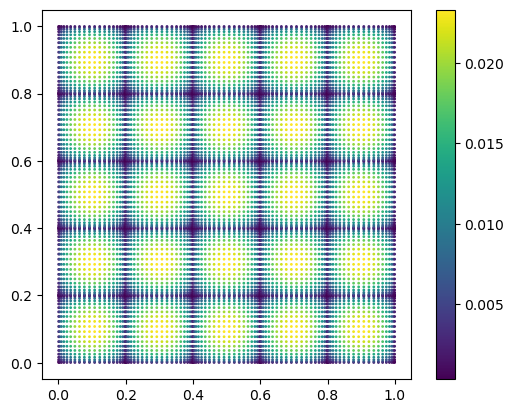

In [4]:
plt.scatter(xi_Omega[:,0], xi_Omega[:,1], s=1, c=w_Omega)
plt.axis('square')
plt.colorbar()

In [5]:
x, w = np.polynomial.legendre.leggauss(int(Q/5))
x = x/2 + 0.5
xi_Gamma_i = []
w_Gamma_i = []
for i in range(5):
    xi_Gamma_i.append(0.2*x + 0.2*i)
    w_Gamma_i.append(w)
xi_Gamma_i = np.array(xi_Gamma_i)
xi_Gamma_i = xi_Gamma_i.flatten()
w_Gamma_i = np.array(w_Gamma_i).flatten()

In [6]:
xi_Gamma_i.shape

(100,)

In [7]:
w_Gamma_i.shape

(100,)

In [8]:
Gamma_l = np.zeros((Q,2))
Gamma_l[:,1] = xi_Gamma_i
Gamma_r = np.ones((Q,2))
Gamma_r[:,1] = xi_Gamma_i
Gamma_b = np.zeros((Q,2))
Gamma_b[:,0] = xi_Gamma_i
Gamma_t = np.ones((Q,2))
Gamma_t[:,0] = xi_Gamma_i

Gamma = np.zeros((4,Q,2))
Gamma[0] = Gamma_l
Gamma[1] = Gamma_r
Gamma[2] = Gamma_b
Gamma[3] = Gamma_t

Gamma = Gamma.reshape(Gamma.shape[0]*Gamma.shape[1],Gamma.shape[2])
w_Gamma = np.array([w_Gamma_i,w_Gamma_i,w_Gamma_i,w_Gamma_i]).flatten()

In [9]:
w_Gamma.shape

(400,)

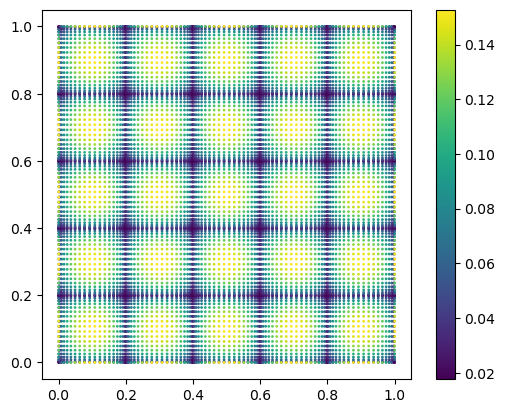

In [12]:
plt.scatter(xi_Omega[:,0], xi_Omega[:,1], s=1, c=w_Omega)
plt.scatter(Gamma[:,0], Gamma[:,1], c=w_Gamma, s=1)
plt.axis('square')
plt.colorbar()

In [10]:
Gamma.shape

(400, 2)

In [13]:
w_Gamma.shape

(400,)

In [47]:
#Interior
x, w = np.polynomial.legendre.leggauss(int(100/5))
x = np.array(np.meshgrid(x,x,indexing='ij')).reshape(2,-1).T/2 + 0.5
w = w/2*0.2
w = (w*w[:,None]).ravel()
print(np.sum(w))
xi_Omega = []
w_Omega = []
for i in range(5):
    for j in range(5):
        newpts = 0.2*x
        newpts[:,0] = newpts[:,0] + 0.2*i
        newpts[:,1] = newpts[:,1] + 0.2*j
        xi_Omega.append(newpts)
        w_Omega.append(w)
w_Omega = np.array(w_Omega).flatten()
w_Omega = torch.tensor(w_Omega)
xi_Omega = np.array(xi_Omega)
xi_Omega = xi_Omega.reshape(xi_Omega.shape[0]*xi_Omega.shape[1],xi_Omega.shape[2])
xi_Omega = torch.tensor(xi_Omega)
#Boundaries
x, w = np.polynomial.legendre.leggauss(int(100/5))
x = x/2 + 0.5
w = w/2*0.2
xi_Gamma_i = []
w_Gamma_i = []
for i in range(5):
    xi_Gamma_i.append(0.2*x + 0.2*i)
    w_Gamma_i.append(w)
xi_Gamma_i = np.array(xi_Gamma_i)
xi_Gamma_i = xi_Gamma_i.flatten()
xi_Gamma_i = torch.tensor(xi_Gamma_i)
w_Gamma_i = np.array(w_Gamma_i).flatten()
w_Gamma_i = torch.tensor(w_Gamma_i)
xi_Gamma_b = torch.zeros((100,2))
xi_Gamma_b[:,0] = xi_Gamma_i
xi_Gamma_t = torch.ones((100,2))
xi_Gamma_t[:,0] = xi_Gamma_i
xi_Gamma_l = torch.zeros((100,2))
xi_Gamma_l[:,1] = xi_Gamma_i
xi_Gamma_r = torch.ones((100,2))
xi_Gamma_r[:,1] = xi_Gamma_i
xi_Gamma_eta = torch.zeros((2*100,2))
xi_Gamma_eta[:100] = xi_Gamma_b
xi_Gamma_eta[100:] = xi_Gamma_t        
xi_Gamma_g = torch.zeros((2*100,2))
xi_Gamma_g[:100] = xi_Gamma_l
xi_Gamma_g[100:] = xi_Gamma_r 
w_Gamma_b = w_Gamma_i
w_Gamma_t = w_Gamma_i
w_Gamma_l = w_Gamma_i
w_Gamma_r = w_Gamma_i
w_Gamma_eta = torch.zeros((2*len(w_Gamma_i)))
w_Gamma_eta[:len(w_Gamma_i)] = w_Gamma_b
w_Gamma_eta[len(w_Gamma_i):] = w_Gamma_t
w_Gamma_g = torch.zeros((2*len(w_Gamma_i)))
w_Gamma_g[:len(w_Gamma_i)] = w_Gamma_l
w_Gamma_g[len(w_Gamma_i):] = w_Gamma_r

0.039999999999999994


(-0.05, 1.05, -0.05, 1.05)

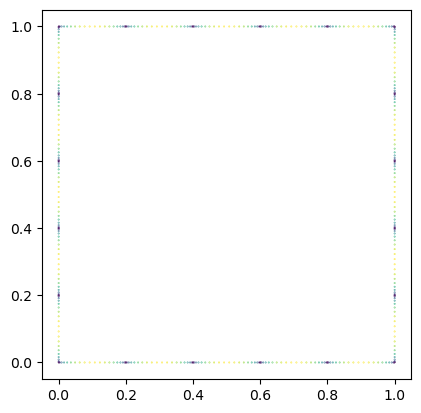

In [39]:
plt.scatter(xi_Gamma_b[:,0], xi_Gamma_b[:,1], c=w_Gamma_b, s=0.1)
plt.scatter(xi_Gamma_t[:,0], xi_Gamma_t[:,1], c=w_Gamma_t, s=0.1)
plt.scatter(xi_Gamma_l[:,0], xi_Gamma_l[:,1], c=w_Gamma_l, s=0.1)
plt.scatter(xi_Gamma_r[:,0], xi_Gamma_r[:,1], c=w_Gamma_r, s=0.1)
plt.axis('square')

(-0.05, 1.05, -0.05, 1.05)

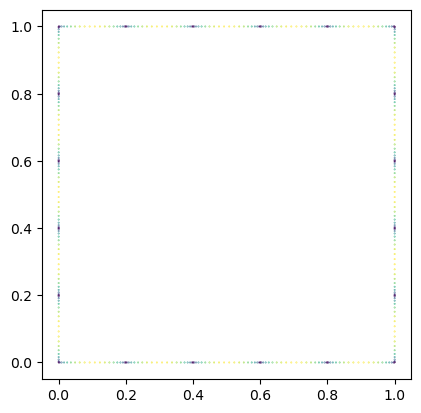

In [38]:
plt.scatter(xi_Gamma_g[:,0], xi_Gamma_g[:,1], c=w_Gamma_g, s=0.1)
plt.scatter(xi_Gamma_eta[:,0], xi_Gamma_eta[:,1], c=w_Gamma_eta, s=0.1)
plt.axis('square')

(-0.04924414591036044,
 1.0492441459103605,
 -0.04924414591036044,
 1.0492441459103605)

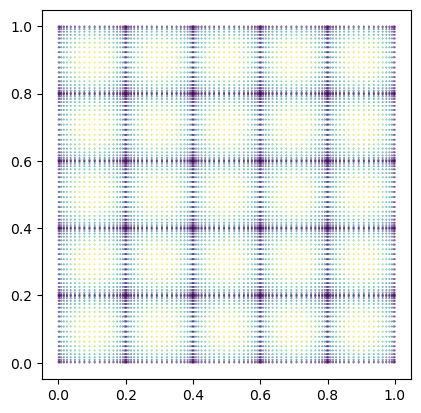

In [37]:
plt.scatter(xi_Omega[:,0], xi_Omega[:,1], c=w_Omega, s=0.1)
plt.axis('square')

In [43]:
torch.sum(w_Gamma_i)

tensor(10., dtype=torch.float64)